# Global Natural Disaster Analysis

In [12]:
!kaggle datasets download cyberevil545/global-natural-disasters-dataset-19602018

Dataset URL: https://www.kaggle.com/datasets/cyberevil545/global-natural-disasters-dataset-19602018
License(s): CC-BY-SA-4.0
  0%|                                                | 0.00/499k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 499k/499k [00:00<00:00, 75.0MB/s]


In [13]:
!unzip global-natural-disasters-dataset-19602018.zip
!rm global-natural-disasters-dataset-19602018.zip

Archive:  global-natural-disasters-dataset-19602018.zip
  inflating: nasa_disaster_dataset.csv  


In [14]:
!kaggle datasets files cyberevil545/global-natural-disasters-dataset-19602018


name                          size  creationDate         
-------------------------  -------  -------------------  
nasa_disaster_dataset.csv  2768384  2025-08-27 12:54:32  


Begin python analysis

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset to pandas dataframe
df = pd.read_csv('nasa_disaster_dataset.csv')
df.head()

,Unnamed: 0,id,country,geolocation,level,adm1,location,disastertype,continent
0,0,109,Albania,Ana E Malit,3,Shkoder,Ana E Malit,flood,Europe
1,1,109,Albania,Bushat,3,Shkoder,Bushat,flood,Europe
2,2,175,Angola,Onjiva,3,Cunene,Onjiva,flood,Africa
3,3,187,Angola,Evale,3,Cunene,Evale,flood,Africa
4,4,187,Angola,Mupa,3,Cunene,Mupa,flood,Africa


In [30]:
# Dataset size and shape
print("Shape of the dataset: {0} rows and {1} columns".format(df.shape[0], df.shape[1]))
print(f"Size of the dataset: {df.size} elements")


Shape of the dataset: 39953 rows and 9 columns
Size of the dataset: 359577 elements


Index(['id', 'country', 'geolocation', 'level', 'adm1', 'location',
       'disastertype', 'continent'],
      dtype='object')


In [44]:
# Count disasters by continent
continent_counts = df['continent'].value_counts()
print(continent_counts)

continent
Asia             17671
North America     7105
Africa            5185
Europe            4806
South America     3315
Oceania           1125
Unknown            746
Name: count, dtype: int64


In [43]:
# Count disasters by type
print(df["disastertype"].value_counts())


disastertype
flood                   17347
storm                   12323
extreme temperature      3506
drought                  2938
earthquake               2403
landslide                 982
volcanic activity         405
mass movement (dry)        49
Name: count, dtype: int64


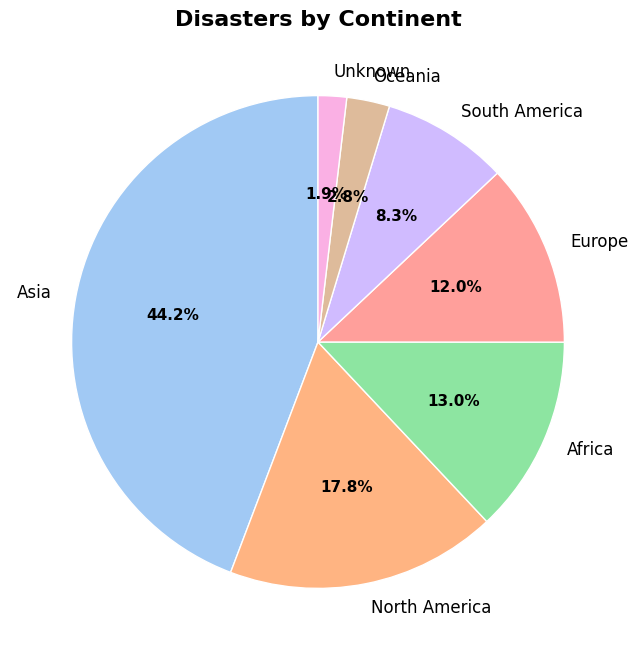

In [52]:
# Pie chart of disasters by continent
colors = sns.color_palette("pastel")

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    continent_counts, 
    labels=continent_counts.index, 
    autopct="%1.1f%%", 
    colors=colors, 
    startangle=90,
    textprops={'fontsize': 12, 'color': 'black'}, 
    wedgeprops={'edgecolor': 'white'}
)

# Styling labels
for text in texts:
    text.set_fontsize(12)
    text.set_color("black")

for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_color("black")
    autotext.set_weight("bold")

# Title
ax.set_title("Disasters by Continent", fontsize=16, weight="bold")

plt.show()

/tmp/ipykernel_10523/4153435166.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


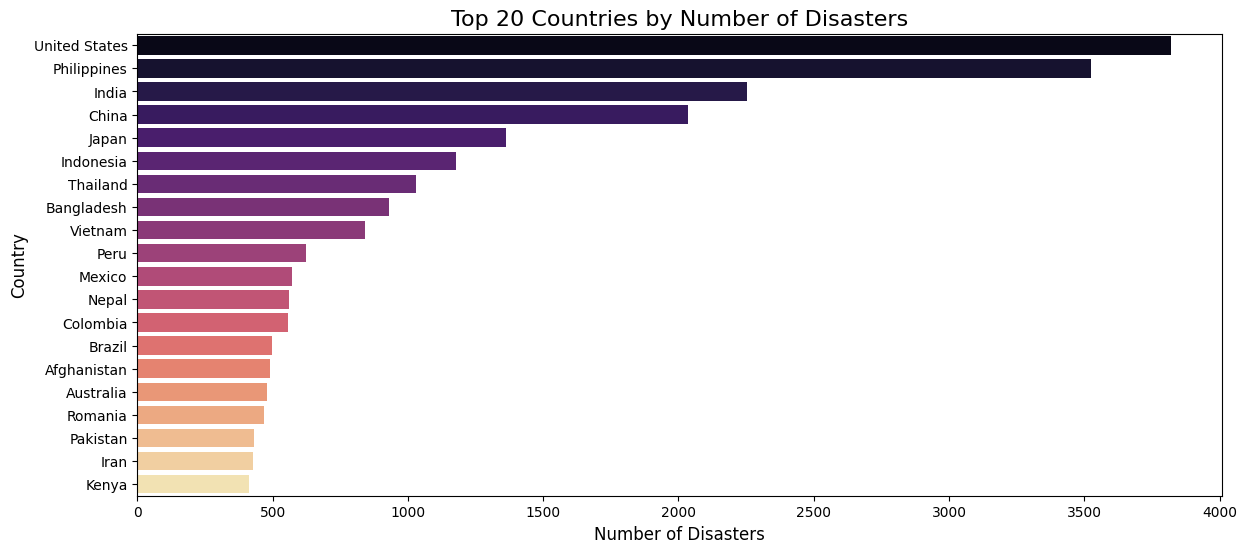

In [53]:
# Count disasters per country
top_countries = df['country'].value_counts().head(20)

# Plotting
plt.figure(figsize=(14,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')

plt.title('Top 20 Countries by Number of Disasters', fontsize=16)
plt.xlabel('Number of Disasters', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()


The barplot above shows the number of disasters per country and is copied directly from cyberevil545's analysis on the 'Global Natural Disasters Dataset (1960 - 2018)' dataset. As a continuation to his thought, I would like to investigate the number of disasters per country weighted to their landmass.

I will be using the dataset 'Countries of the World' by fernandol as a reference for country landmass. The barplot below shows the number of disasters per million square miles

In [56]:
# Aquiring landmass data
!kaggle datasets download fernandol/countries-of-the-world
!unzip -o countries-of-the-world.zip
!rm countries-of-the-world.zip

# Landmass dataset to pandas dataframe
landmass_df = pd.read_csv('countries of the world.csv')
landmass_df.head()

Dataset URL: https://www.kaggle.com/datasets/fernandol/countries-of-the-world
License(s): CC0-1.0
  0%|                                               | 0.00/13.4k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 13.4k/13.4k [00:00<00:00, 2.73MB/s]
Archive:  countries-of-the-world.zip
  inflating: countries of the world.csv  


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
